TODO:
- Replicate table 3.4 from Chaoyun's paper
- Check Chaoyun's code

In [4]:
from __future__ import division

from utils import *
from create_data import *

import os
import pandas as pd
import numpy as np
from collections import OrderedDict
import time
from datetime import datetime
from datetime import date
from datetime import timedelta
from dateutil.parser import parse
# from datetime import utcfromtimestamp

# import sqlite3

from ggplot import *
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

### R stuff

In [2]:
# If you want to ignore R warnings.
# import warnings
# warnings.filterwarnings('ignore')

# from rpy2.robjects.packages import isinstalled
# from rpy2.robjects.vectors import StrVector
# import rpy2.robjects.packages as rpackages
# from rpy2.robjects.packages import importr

# utils = rpackages.importr('utils')
# utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# packnames = ('forecast')
# utils.install_packages(packnames)

# isinstalled('forecast')

# %%R
# y <- 1

# %load_ext rpy2.ipython

### Define project vars

In [5]:
dir_proj = '/Users/sipola/Google Drive/education/coursework/graduate/edinburgh/dissertation/thesis'
dir_data = os.path.join(dir_proj, 'data')
dir_run = os.path.join(dir_proj, 'run', str(date.today()))

In [6]:
HOUSE_IDS = range(1, 22); HOUSE_IDS.remove(14)  # no house 14
APP_NAMES = ['fridge', 'kettle', 'washing machine', 'dishwasher', 'microwave']
# tz = 'Europe/London'

In [7]:
# params_appliance = get_params_appliance()
dir_refit_csv = os.path.join(dir_data, 'CLEAN_REFIT_081116')
dir_refit = os.path.join(dir_data, 'refit')

In [7]:
# save_refit_data(dir_refit_csv=dir_refit_csv,
#                 dir_refit_np=dir_refit,
#                 nrows=None)

writing REFIT data...
added house 1 (0.31 min)
added house 2 (0.25 min)
added house 3 (0.32 min)
added house 4 (0.37 min)
added house 5 (0.37 min)
added house 6 (0.31 min)
added house 7 (0.32 min)
added house 8 (0.33 min)
added house 9 (0.24 min)
added house 10 (0.34 min)
added house 11 (0.32 min)
added house 12 (0.29 min)
added house 13 (0.26 min)
added house 15 (0.36 min)
added house 16 (0.27 min)
added house 17 (0.25 min)
added house 18 (0.24 min)
added house 19 (0.22 min)
added house 20 (0.19 min)
added house 21 (0.2 min)
done!


In [8]:
apps = pd.read_csv(os.path.join(dir_data, 'appliances.csv'))
app_dict = create_app_dict()
apps = apps_add_cols_from_patterns(apps, app_dict)

In [9]:
get_house_app_tuples, get_app_nums, get_app_name, is_a_target_app = create_app_funs(apps, app_dict, APP_NAMES)
load_app, load_ts, load_issues = create_load_funs(dir_refit)

# app_col, pattern = app_col_and_pattern_tuples[1]
# for i in apps.loc[apps[app_col] == 1]['ApplianceOrig'].values:
#     print i

# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('fridge')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('kettle')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('washi')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('dish')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('micro')]

# get_house_app_tuples('fridge')
# get_house_app_tuples('kettle')
# get_house_app_tuples('washing machine')

In [326]:
# Note change in fridge-freezer model.
# plot_app_change(4, datetime(2014,8,17), app_names='fridge-freezer')

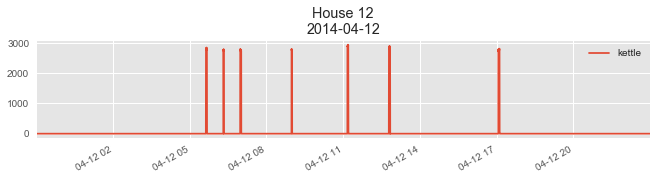

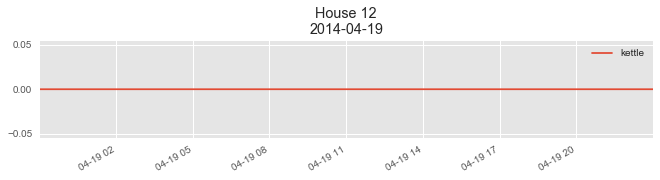

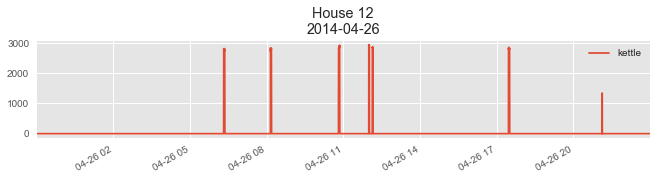

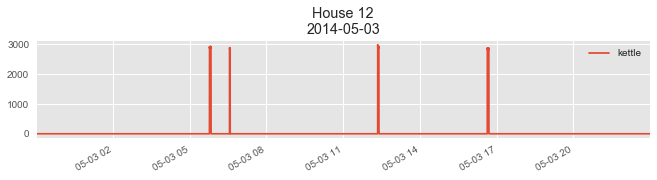

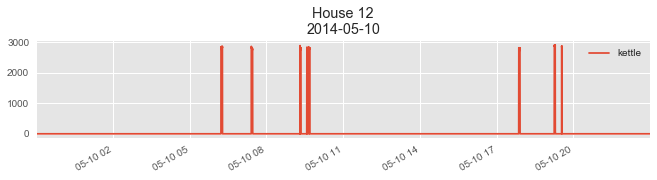

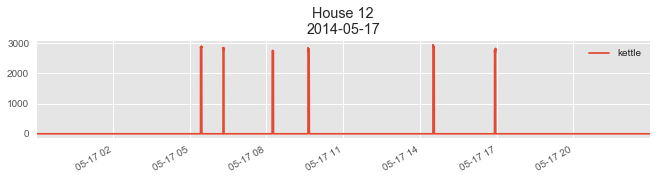

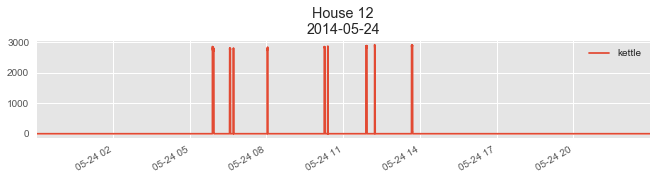

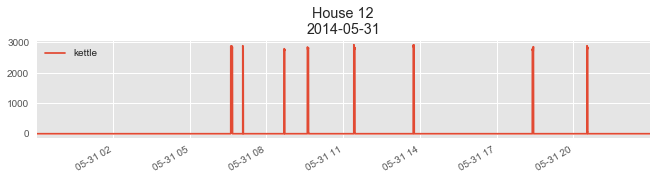

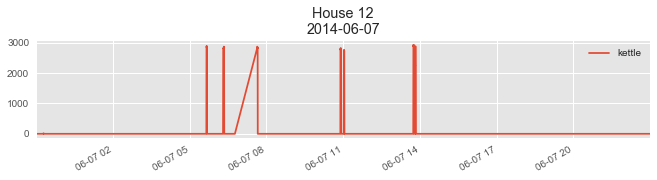

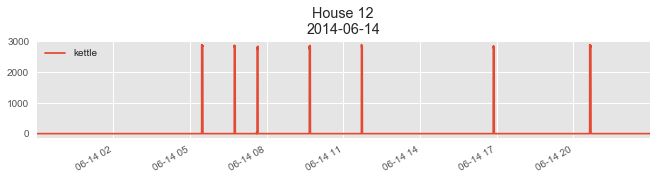

In [347]:
# Note how it appears to be a kettle and not a computer site.
# plot_app_change(12, datetime(2014,5,17), day_range=np.array(range(-5,5))*7, app_names='kettle')

In [ ]:
# create_daily_plots(house_ids, dir_run)

In [38]:
# dstats = create_daily_stats(HOUSE_IDS,
#                             pkl_path=os.path.join(dir_data, 'stats_by_day.pkl'),
#                             nrow=None)

In [580]:
dstats = pd.read_pickle(os.path.join(dir_data, 'stats_by_day.pkl'))

In [279]:
# plot_day(2, datetime.datetime(2014,9,7), figsize=(11,8))

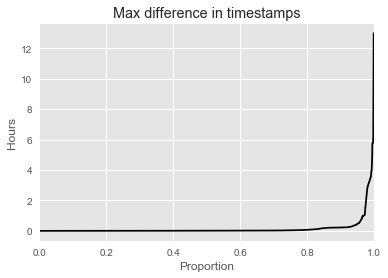

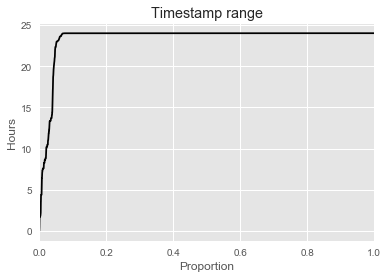

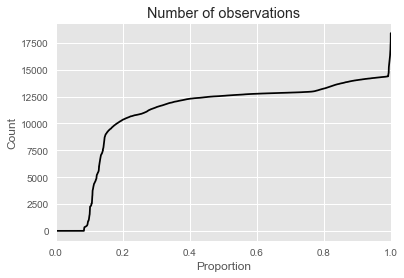

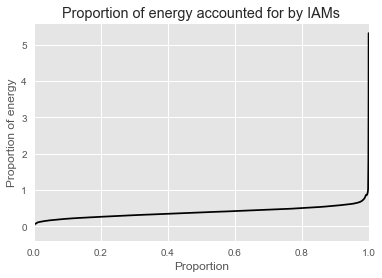

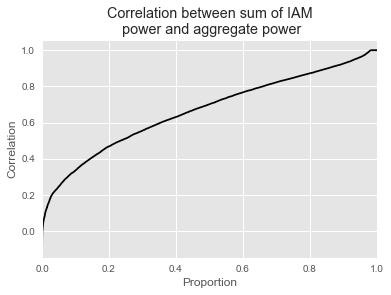

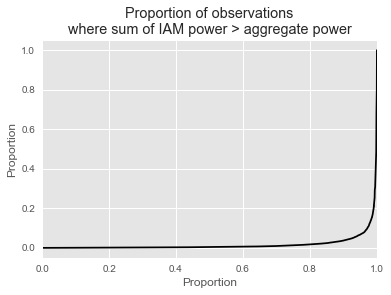

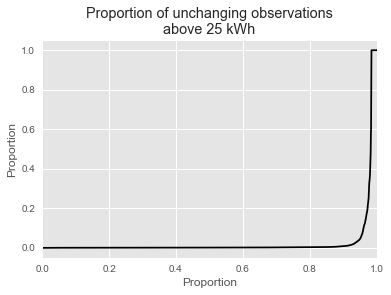

In [637]:
vars_to_plot = [{'col': ('UnixDiff', 'max'), 'ylab': 'Hours', 'title': 'Max difference in timestamps'},
                {'col': 'HourRange', 'ylab': 'Hours', 'title': 'Timestamp range'},
                {'col': ('RowNum', 'len'), 'ylab': 'Count', 'title': 'Number of observations'},
                {'col': ('PctAccountedEnergy', 'total'), 'ylab': 'Proportion of energy', 'title': 'Proportion of energy accounted for by IAMs'},
                # {'col': ('PctAccountedEnergy', 'std'), 'ylab': 'Proportion of energy', 'title': 'Proportion of energy accounted for\nby IAMs (standard dev.)'},
                {'col': 'SumToMainCorr', 'ylab': 'Correlation', 'title': 'Correlation between sum of IAM\n power and aggregate power'},
                {'col': ('Issues', 'mean'), 'ylab': 'Proportion', 'title': 'Proportion of observations\nwhere sum of IAM power > aggregate power'},
                {'col': ('Appliance0', 'prop_unchanging_large_value'), 'ylab': 'Proportion', 'title': 'Proportion of unchanging observations\nabove 25 kWh'}]
for var_to_plot in vars_to_plot:
    plot_data = pd.DataFrame({'X': sorted(dstats[var_to_plot['col']].dropna())})
    plot_data['Proportion'] = [i/plot_data.shape[0] for i in range(plot_data.shape[0])]
    ax = plot_data.set_index('Proportion').plot(color='black')
    ax.set_title(var_to_plot['title'])
    ax.set_ylabel(var_to_plot['ylab'])
    ax.legend().set_visible(False)

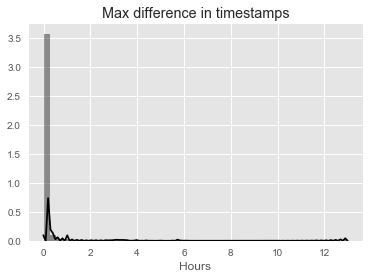

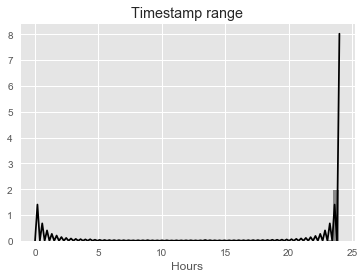

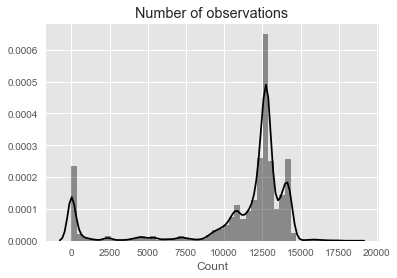

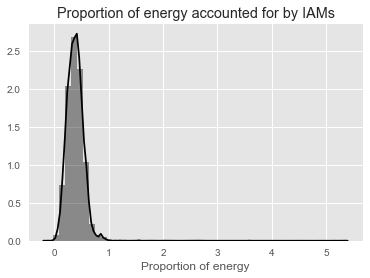

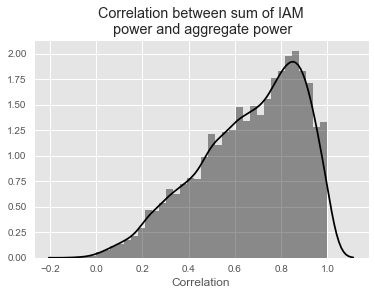

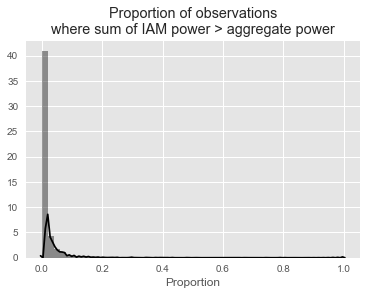

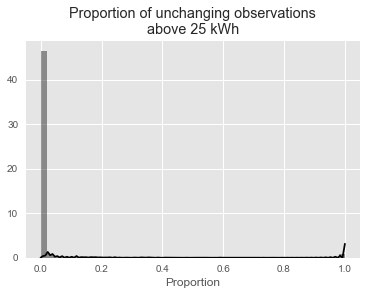

In [638]:
for var_to_plot in vars_to_plot:
    var_name = var_to_plot['col']
    kde_data = dstats[var_to_plot['col']].replace([np.inf, -np.inf], np.nan).dropna().values
    ax = sns.distplot(kde_data, rug=False, color='black')
    ax.set_title(var_to_plot['title'])
    ax.set_xlabel(var_to_plot['ylab'])
    plt.show()

In [10]:
# Get NaN proportions.
for var_to_plot in vars_to_plot:
    x = dstats[var_to_plot['col']].replace([np.inf, -np.inf], np.nan).values
    print '{0}: {1:0.2g}'.format(var_to_plot['col'], np.mean(np.isnan(x)))

('UnixDiff', 'max'): 0.083
HourRange: 0.083
('RowNum', 'len'): 0
('PctAccountedEnergy', 'total'): 0.084
('PctAccountedEnergy', 'std'): 0.12
SumToMainCorr: 0.084
('Issues', 'mean'): 0.083


Issues


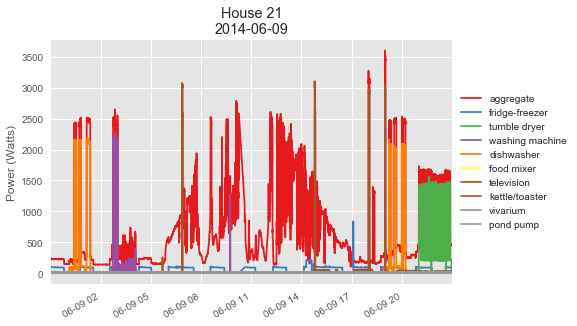

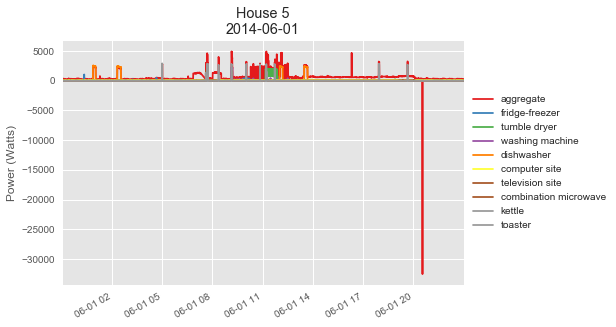

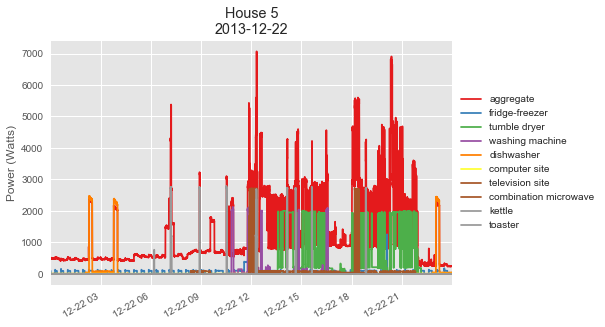

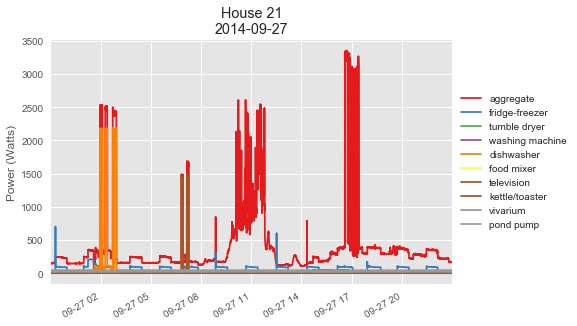

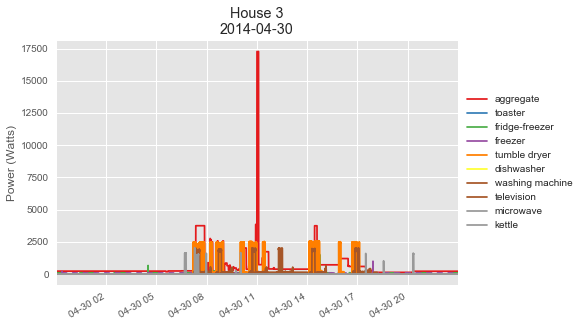

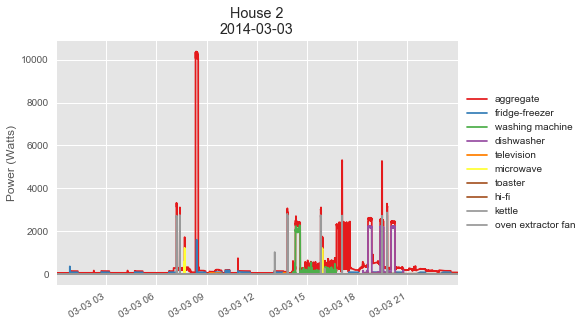

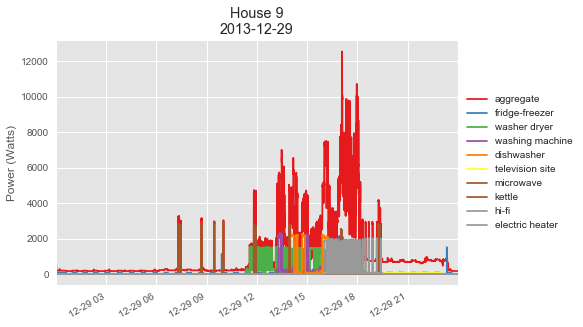

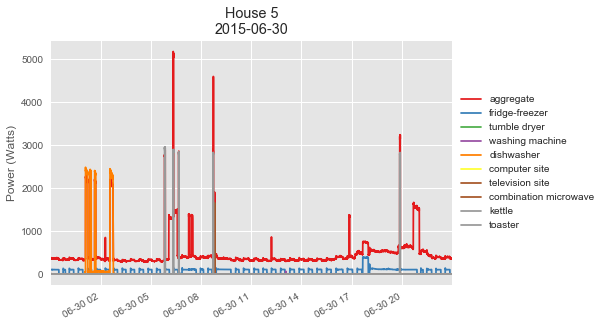

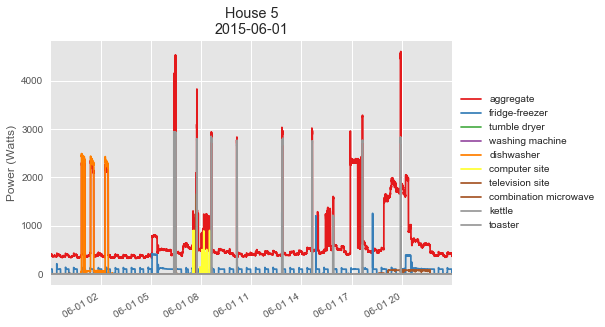

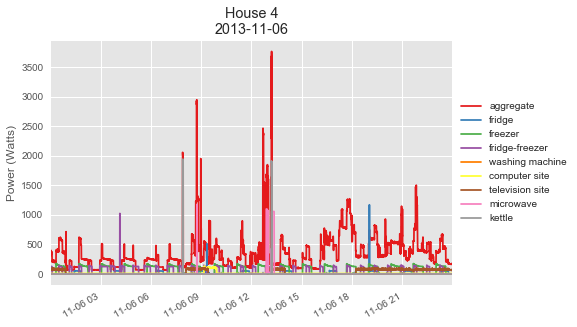

In [639]:
# %run create_data

def plot_samples(condition, n=10):
    sample = dstats.loc[condition].sample(n)
    dt_series = sample.index.to_datetime()
    house_ids = sample['House'].values
    for dt, house_id in zip(dt_series, house_ids):
        plot_day(dt=dt, house_id=house_id)
        plt.show()

np.random.seed(1)
# print 'UnixDiff'
# plot_samples(dstats[('UnixDiff', 'max')] > 0.25, 10)
# print 'HourRange'
# plot_samples(dstats['HourRange'] < 23.5, 10)
# print 'RowNum'
# plot_samples((np.isfinite(dstats[('RowNum', 'len')].values)) & (dstats[('RowNum', 'len')] < 2000), 10)
# print 'PctAccountedEnergy - identity'
# plot_samples(dstats[('PctAccountedEnergy', 'identity')] > float('inf'), 10)
# print 'PctAccountedEnergy - std'
# plot_samples(dstats[('PctAccountedEnergy', 'std')] > float('inf'), 10)
# print 'SumToMainCorr'
# plot_samples(dstats['SumToMainCorr'] < 0.20, 10)
print 'Issues'
plot_samples(dstats[('Issues', 'mean')] > 0.01, 10)
# print 'prop_unchanging_large_value'
# plot_samples((np.isfinite(dstats[('Appliance1', 'prop_unchanging_large_value')].values)) & \
#                  (dstats[('Appliance1', 'prop_unchanging_large_value')] > 0.05),
#              10)


In [424]:
# house_id = 16
# dt = datetime(2014,10,11)
# df = get_df(house_id=house_id, dt_start=dt)

In [462]:
# dstats.to_csv(os.path.join(dir_data, 'dstats_TEMP.csv'))

In [635]:
dstats = clean_daily_stats(dstats)

cleaning daily stats...
1013 (9.3%) rows affected in total, 1013 (9.3%) new | Condition 1 (('RowNum', 'len'))
750 (6.9%) rows affected in total, 650 (6%) new | Condition 2 (('UnixDiff', 'max'))
605 (5.6%) rows affected in total, 422 (3.9%) new | Condition 3 (HourRange)
284 (2.6%) rows affected in total, 246 (2.3%) new | Condition 4 (('Issues', 'mean'))
64 (0.59%) rows affected in total, 20 (0.18%) new | Condition 5 (HoursInDay)
9 (0.083%) rows affected in total, 7 (0.064%) new | Condition 6 (('Appliance0', 'min'))
0 (0%) rows affected in total, 0 (0%) new | Condition 7 (('Appliance1', 'min'))
159 (1.5%) rows affected in total, 122 (1.1%) new | Condition 8 (('Appliance1', 'prop_unchanging_large_value'))
0 (0%) rows affected in total, 0 (0%) new | Condition 9 (('Appliance2', 'min'))
105 (0.96%) rows affected in total, 35 (0.32%) new | Condition 10 (('Appliance2', 'prop_unchanging_large_value'))
0 (0%) rows affected in total, 0 (0%) new | Condition 11 (('Appliance3', 'min'))
114 (1%) rows

In [12]:
# get_energy(dstats, 1, datetime(2014,4,5), [1])

In [19]:
# %run create_data

get_app_nums(4, 'fridge')
# get_energy(dstats, 4, datetime.datetime(2013,10,12), [1, 3])

[1, 3]

In [484]:
# get_house_app_tuples('washing machine', True)

In [502]:
# agg.loc[agg['House']==house_id].loc[str(dt.date())]['Delete'].values[0]

In [36]:
# X, Y, x_house, x_date = create_data(HOUSE_IDS, app_names, dstats, dir_data)

/Users/sipola/miniconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/sipola/miniconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/sipola/miniconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


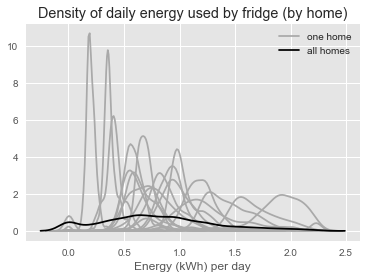

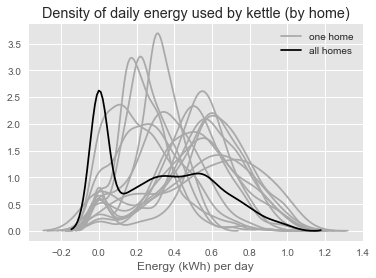

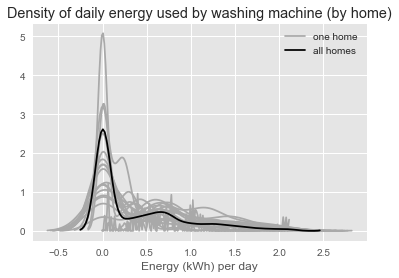

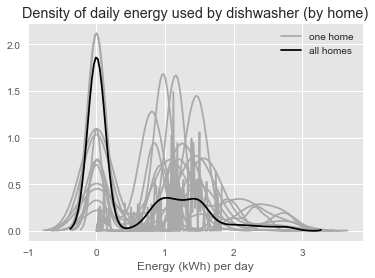

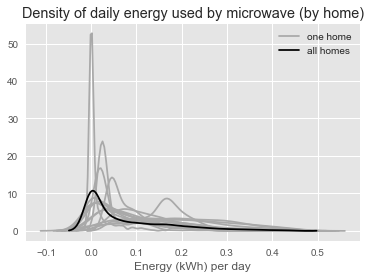

In [14]:
X = np.load(os.path.join(dir_data, 'for_model', 'real', 'X.npy'))
Y = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y.npy'))
x_house = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_house.npy'))
x_date = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_date.npy'))

house_ids_plot = list(set(x_house))
for i, app_name in enumerate(APP_NAMES):
    y = pd.DataFrame({'Energy': [y_row[i] for y_row in Y],
                      'House': x_house})
    y = y[y['Energy'] < np.percentile(y['Energy'], 98)]
    for house_id_plot in house_ids_plot:
        label = 'one home' if house_id_plot == house_ids_plot[0] else None
        y_house = y.loc[y['House'] == house_id_plot]
        # ax = sns.kdeplot(y_house['Energy'].values, label='House {}'.format(house_id_plot))
        ax = sns.kdeplot(y_house['Energy'].values, color='darkgray', label=label)
        ax.set_title('Density of daily energy used by {} (by home)'.format(app_name))
        ax.set_xlabel('Energy (kWh) per day')
        # ax.set_xlim(0,)
    ax = sns.kdeplot(y['Energy'].values, color='black', label='all homes')
    plt.show()

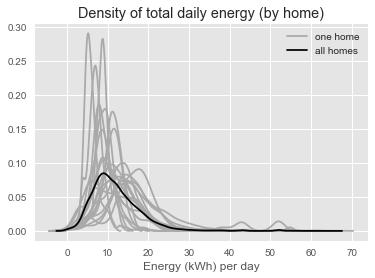

In [15]:
y = pd.DataFrame({'Energy': dstats[('EnergyAppliance0', 'sum')],
                  'House': dstats['House']})
# y = y[y['Energy'] < np.percentile(y['Energy'], 95)]
# print y
not_too_big   = y['Energy'] < np.percentile(y['Energy'].dropna(), 99.99)
not_too_small = y['Energy'] > np.percentile(y['Energy'].dropna(), 0.01)
y = y[(not_too_big) & (not_too_small)]
for house_id in HOUSE_IDS:
    label = 'one home' if house_id == HOUSE_IDS[0] else None
    y_house = y.loc[y['House'] == house_id]
    ax = sns.kdeplot(y_house['Energy'].values, color='darkgray', label=label)
    ax.set_title('Density of total daily energy (by home)')
    ax.set_xlabel('Energy (kWh) per day')
ax = sns.kdeplot(y['Energy'].values, color='black', label='all homes')
plt.show()

In [40]:
# # One day with negative aggregate.
# plot_day(3, datetime(2014,4,6))

5


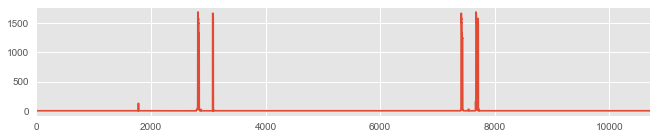

In [576]:
# Test code that gets number of activations.
house_id = 8
app_name = 'microwave'
dt_start = datetime(2014,9,25)

params = make_app_params_dict()[app_name]
app_num = get_app_nums(house_id, app_name)[0]

ts_series = load_ts(house_id)
aligned_arrays, ts_mask = get_aligned_ts_mask_for_day(ts_series, dt_start, 6)

app_power = load_app(house_id, app_num)[ts_mask]
print get_num_activations(app_power,
                          ts_series[ts_mask],
                          params)

plot_series(app_power, figsize=(11,2))

In [153]:
# Plot num activations vs energy.
dir_real_old = '/Users/sipola/Google Drive/education/coursework/graduate/edinburgh/dissertation/thesis/data/for_model/real'
dir_real_new = '/Users/sipola/Google Drive/education/coursework/graduate/edinburgh/dissertation/thesis/run/2017-06-28/real'
dat_old = np.load(os.path.join(dir_real_old, 'Y.npy'))
# dat_old = np.load(os.path.join(dir_real_new, 'Y1.npy'))
dat_new = np.load(os.path.join(dir_real_new, 'Y1.npy'))

dat_new

array([[ 0.41592917,  0.        ,  0.        ,  0.88252639,  0.        ],
       [ 0.31927667,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.31819111,  0.        ,  0.        ,  0.        ,  0.        ],
       ..., 
       [ 2.23197417,  0.        ,  0.        ,  1.46398306,  0.        ],
       [ 2.23187083,  0.        ,  0.        ,  1.46391528,  0.        ],
       [ 2.23194833,  0.        ,  0.        ,  1.46396611,  0.        ]])

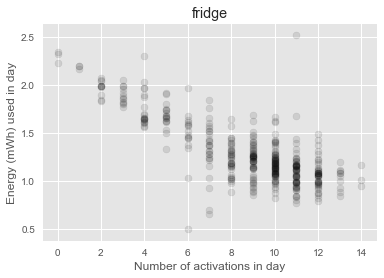

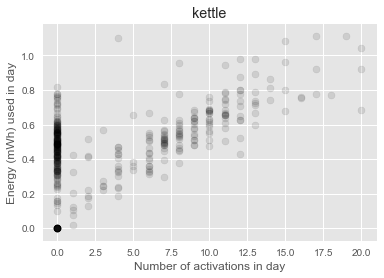

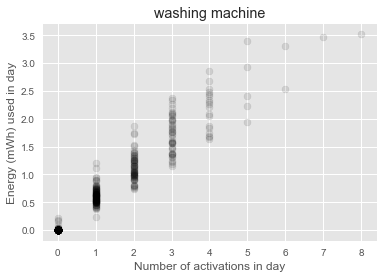

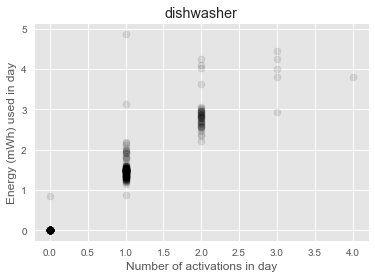

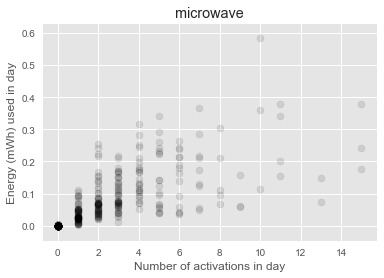

In [683]:
dir_real_new = '/Users/sipola/Google Drive/education/coursework/graduate/edinburgh/dissertation/thesis/run/2017-06-29/real'

X = np.load(os.path.join(dir_real_new, 'X.npy'))
Y1 = np.load(os.path.join(dir_real_new, 'Y1.npy'))
Y2 = np.load(os.path.join(dir_real_new, 'Y2.npy'))
x_house = np.load(os.path.join(dir_real_new, 'x_house.npy'))
x_date = np.load(os.path.join(dir_real_new, 'x_date.npy'))

house_id = 3  # number or None

for idx, app_name in enumerate(APP_NAMES):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if house_id is None:
        ax.scatter(Y2[:,idx], Y1[:,idx], alpha=0.1, color='black')
    else:
        ax.scatter(Y2[:,idx][x_house==house_id], Y1[:,idx][x_house==house_id], alpha=0.1, color='black')
    ax.set_title(app_name)
    ax.set_ylabel('Energy (mWh) used in day')
    ax.set_xlabel('Number of activations in day')
    # plt.hexbin(dat_old[:,idx], dat_new[:,idx], bins='log')
    plt.show()

# house 3 has weird 

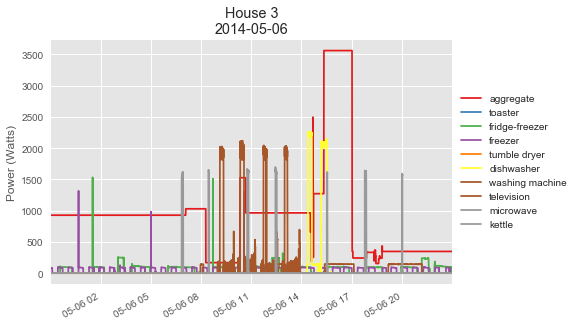

In [490]:
plot_day(3, date_to_datetime(datetime(2014,5,6)))

number of obs: 108
0


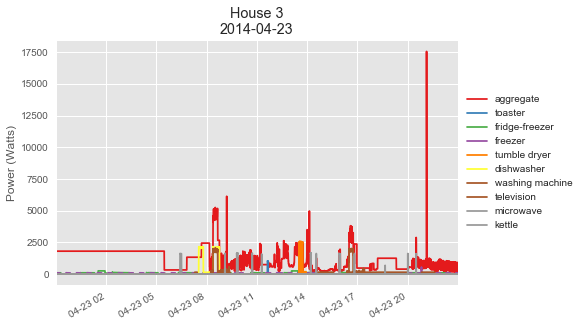

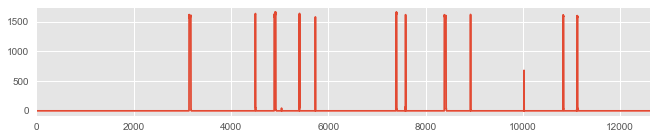

0


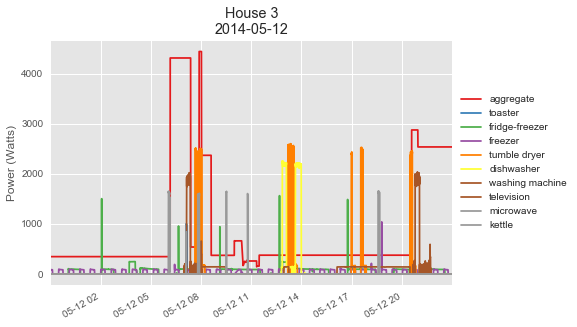

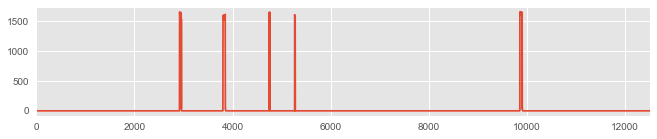

0


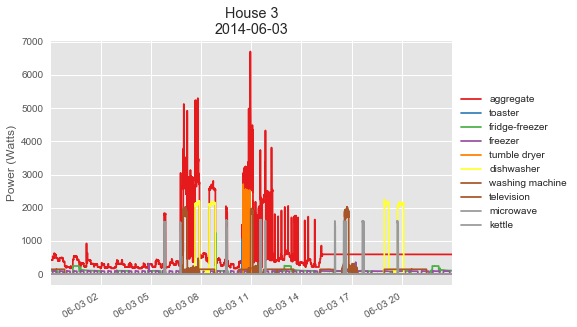

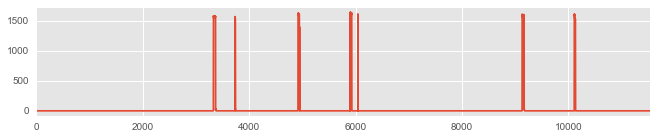

0


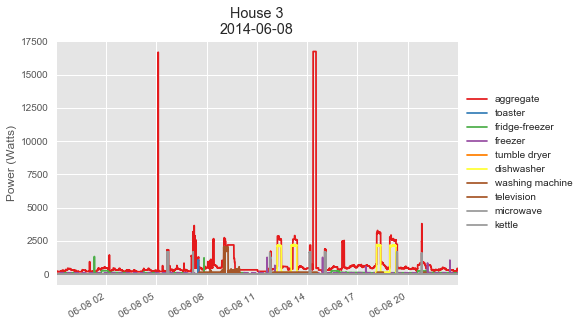

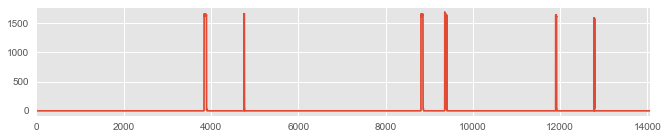

0


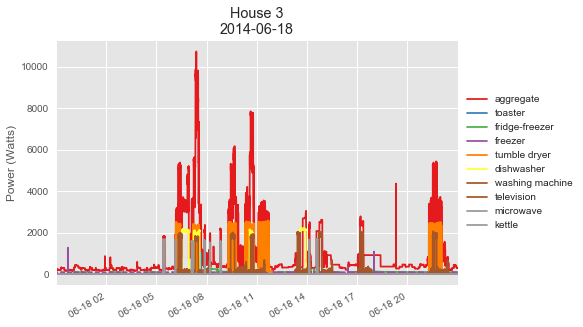

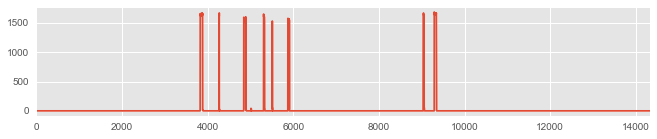

In [717]:
# # fridge
# app_idx = 0
# bad_idx = np.where(Y2[:,app_idx] == 1)[0]
# # bad_idx = np.where(Y2[:,app_idx] == 12)[0]

# # dishwasher
# app_idx = 3
# bad_idx = np.where((Y1[:,app_idx] > 30) & (Y2[:,app_idx] < 1))[0]

# kettle
app_idx = 1
bad_idx = np.where((Y1[:,app_idx] > 0.5) & (Y2[:,app_idx] == 0))[0]

# # washing machine
# app_idx = 2
# bad_idx = np.where((Y1[:,app_idx] > 5) & (Y2[:,app_idx] < 3))[0]

print 'number of obs: {}'.format(len(bad_idx))
app_name = APP_NAMES[app_idx]
    
# plot_series(X[(x_house == house_id) & (x_date == d)][0])

app_params_house_3 = make_app_params_dict()

for idx in bad_idx[:5]:
    
    house_id = x_house[idx]
    d = x_date[idx]
    
    app_nums = get_app_nums(house_id, app_name)
    if len(app_nums) > 1:
        print 'WARNING: more than two of this app in this home'
    
    ts_series = load_ts(house_id)
    ts_mask = get_ts_mask(ts_series, date_to_datetime(d))
    app_power = load_app(house_id, app_nums[0])[ts_mask]
    
    print get_num_activations(app_power, ts_series[ts_mask], app_params[app_name])
    
    plot_day(house_id, date_to_datetime(d))
    plt.show()
    plot_series(app_power)
    plt.show()

In [218]:
house_id = 13
dt = datetime(2014,4,7)
_, ts_mask = get_aligned_ts_mask_for_day(load_ts(13), dt, 6)
np.mean(load_issues(13)[ts_mask])

0.24904153354632588

In [721]:
# plt.close()
# for x, house_id, d in zip(X, x_house, x_date):
#     plot_series(x)
#     plot_day(house_id=house_id, dt=date_to_datetime(d))
#     plt.show()

number of rows: 94
delete: 1


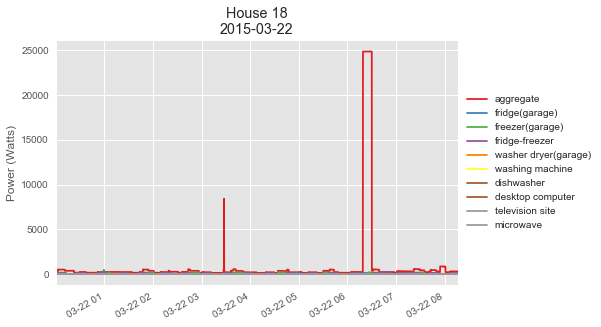

delete: 0


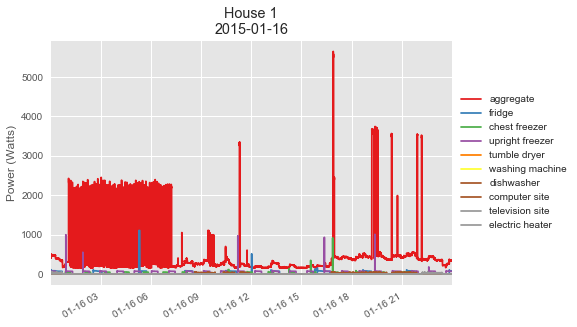

delete: 0


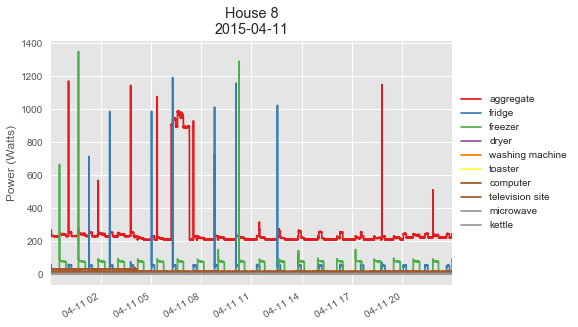

delete: 0


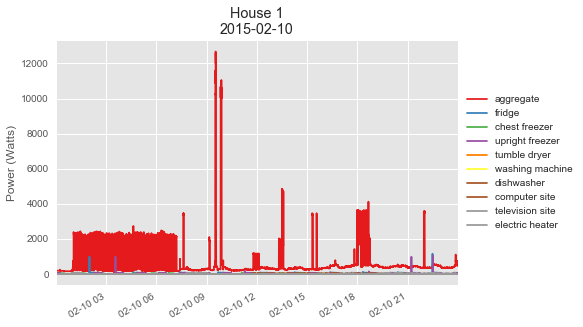

delete: 0


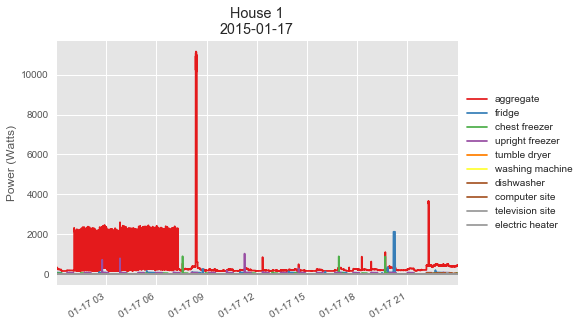

delete: 1


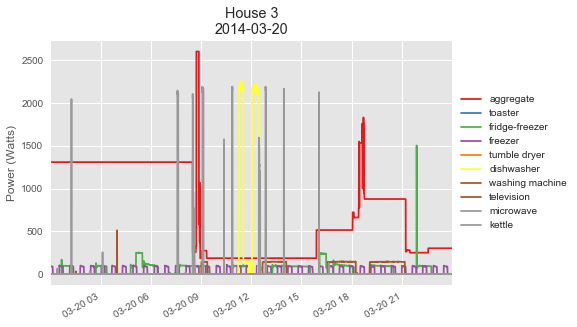

delete: 1


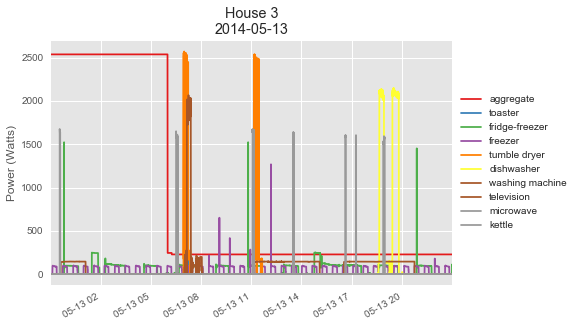

delete: 0


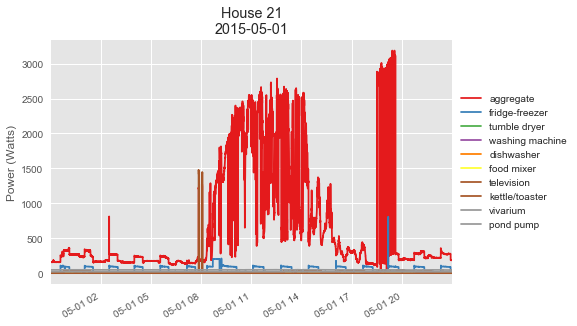

delete: 0


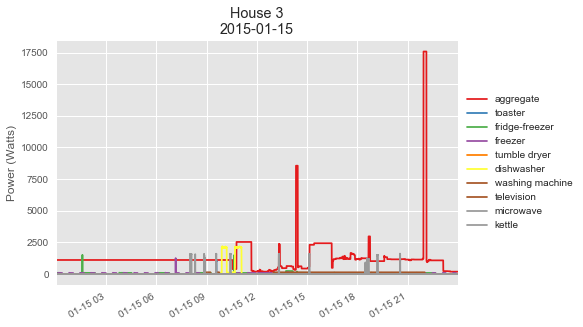

delete: 0


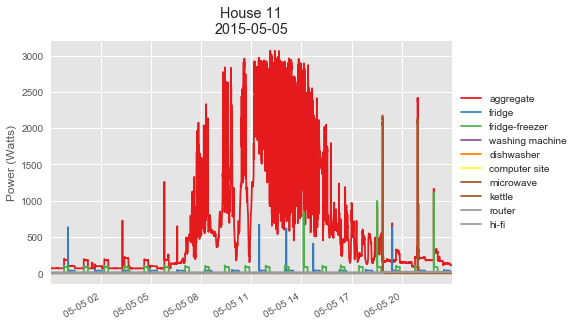

In [722]:
def plot_days_with_conditions(dstats, dstats_cond, max_to_plot=10):
    
    dstats_sub = dstats.loc[dstats_cond]
    print 'number of rows: {}'.format(dstats_sub.shape[0])

    num_to_plot = min(max_to_plot, dstats_sub.shape[0])
    sample = dstats_sub.sample(num_to_plot)

    dt_series = sample.index.to_datetime()
    house_ids = sample['House'].values
    
    for dt, house_id in zip(dt_series, house_ids):
        delete = dstats.loc[(dstats['House']==house_id) & (dstats.index==dt)]['Delete'].values[0]
        print 'delete: {}'.format(delete)
        plot_day(dt=dt, house_id=house_id)
        plt.show()
        
# plot_days_with_conditions(   
#     dstats,
#     dstats[('Appliance2', 'prop_unchanging_large_value')] > 0.1,
#     max_to_plot=10
# )

plot_days_with_conditions(   
    dstats,
    dstats[('SumToMainCorr')] < 0.1,
    max_to_plot=10
)

# plot_days_with_conditions(   
#     dstats,
#     dstats[('Issues', 'mean')] > 0.1,
#     max_to_plot=10
# )

In [751]:
# Check output from debug run of creation of synthetic data.

house_id = 4
app_num = 3
dt = datetime(2015,7,4)

app_name = get_app_name(house_id, app_num)
if app_name == 'fridge-freezer':
    app_name = 'fridge'
ts_series = load_ts(house_id)
aligned_idx, ts_mask = get_aligned_ts_mask_for_day(ts_series, dt, 6)
app_power = load_app(house_id, app_num)

if is_a_target_app(house_id, app_num):
    energy = get_energy(dstats, house_id, dt.date(), [app_num])
    activations = get_num_activations(app_power[ts_mask],
                                      ts_series[ts_mask],
                                      app_params[app_name])
else:
    energy = None
    activations = None
    
    
print 'app_name: {}'.format(app_name)
print 'app_power: {}'.format(app_power[ts_mask][:5])
print 'energy: {}'.format(energy)
print 'activations: {}'.format(activations)

app_name: fridge
app_power: [131 132 132 131 132]
energy: 0.946033611111
activations: 39
